Reference: Udacity


# Creating a Tensor with tf.constant()
A Tensor can be a scalar, a vector or a matrix. Let's use tf.constant() to create these tensor types.

A tensor created with tf.constant() is immutable.

In [1]:
# We will first import tensorflow as tf

import tensorflow as tf
import numpy as np

In [2]:
# Creating a scalar tensor
# We can specify dtype but TF will detect its if left unspecified

scalar_tensor = tf.constant(10)

In [3]:
# Displaying created tensor

print(scalar_tensor)

tf.Tensor(10, shape=(), dtype=int32)


In [4]:
# We can also create a vector or rank 1 tensor
# Simply put, a vector is one dimensional
# We can create it from a list of values

vect_tensor = tf.constant([1.0,2.0,3.0,4.0,5.0,6.0])

In [5]:
print(vect_tensor)

tf.Tensor([1. 2. 3. 4. 5. 6.], shape=(6,), dtype=float32)


A vector of 1 dimensional values was created. As you can see, the data type is float32 because the values were floats. TensorFlow detects that automatically from values if the data type was not mentioned.

Let's now create a tensor with rank 2 or two dimensions. This is actually a matrix.

In [8]:
mat_tensor = tf.constant([[2,4],
                         [6,8],
                         [10,12]], dtype=tf.int32)

print(mat_tensor)

tf.Tensor(
[[ 2  4]
 [ 6  8]
 [10 12]], shape=(3, 2), dtype=int32)


If you can see in the displayed tensor above, the shape is (3,2) which means our tensor has 3 rows and 2 columns.

We can also check the number of dimensions or axes of a tensor using tensor_name.ndim

In [9]:
scalar_tensor.ndim

0

A scalar tensor does not have any dimension. It's just a single value. But if we do the same thing for a vector or matrix, you will see something different.

In [10]:
# A vector has 1 dimension

vect_tensor.ndim

1

In [11]:
# A matrix has 2D or more dimensions

mat_tensor.ndim

2


Just like NumPy array, a tensor can have many dimensions. Let's create a tensor with 3 dimensions.

In [12]:
tensor_3d = tf.constant([
                         [[1,2,3,4,5],
                         [6,7,8,9,8]],
                         [[1,3,5,7,9],
                         [2,4,6,8,1]],
                         [[1,2,3,5,4],
                         [3,4,5,6,7]], ])

print(tensor_3d)

tf.Tensor(
[[[1 2 3 4 5]
  [6 7 8 9 8]]

 [[1 3 5 7 9]
  [2 4 6 8 1]]

 [[1 2 3 5 4]
  [3 4 5 6 7]]], shape=(3, 2, 5), dtype=int32)


In [13]:
tensor_3d.ndim

3

A tensor can be converted into NumPy array by calling tensor_name.numpy or np.array(tensor_name).

TensorFlow plays well with NumPy. And if not yet done, TensorFlow recently posted that they are working on gettint the whole of NumPy into TensorFlow.

In [14]:
# Converting a tensor into a NumPy array

n_array = tensor_3d.numpy()

n_array

array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 8]],

       [[1, 3, 5, 7, 9],
        [2, 4, 6, 8, 1]],

       [[1, 2, 3, 5, 4],
        [3, 4, 5, 6, 7]]], dtype=int32)

In [15]:
# Using np.array(tensor_name)

np.array(tensor_3d)

array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 8]],

       [[1, 3, 5, 7, 9],
        [2, 4, 6, 8, 1]],

       [[1, 2, 3, 5, 4],
        [3, 4, 5, 6, 7]]], dtype=int32)

## Creating a Tensor with tf.Variable

A tensor created with tf.constant() is immutable, it can not be changed. Such kind of tensor can not be used as weights in neural networks because they need to be changed/updated in backpropogation for example.

With tf.Variable(), we can create tensors that can be mutable and thus can be used in things like updating the weights of neural networks like said above.

Creating variable tensor is as simple as the former.

In [16]:
var_tensor = tf.Variable([
                         [[1,2,3,4,5],
                         [6,7,8,9,8]],
                         [[1,3,5,7,9],
                         [2,4,6,8,1]],
                         [[1,2,3,5,4],
                         [3,4,5,6,7]], ])

print(var_tensor)

<tf.Variable 'Variable:0' shape=(3, 2, 5) dtype=int32, numpy=
array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 8]],

       [[1, 3, 5, 7, 9],
        [2, 4, 6, 8, 1]],

       [[1, 2, 3, 5, 4],
        [3, 4, 5, 6, 7]]], dtype=int32)>


In [17]:
# Converting a variable tensor into NumPy array

var_tensor.numpy()

array([[[1, 2, 3, 4, 5],
        [6, 7, 8, 9, 8]],

       [[1, 3, 5, 7, 9],
        [2, 4, 6, 8, 1]],

       [[1, 2, 3, 5, 4],
        [3, 4, 5, 6, 7]]], dtype=int32)

## Creating a Tensor from Existing Functions

There some types of uniform tensors that you would not want to create from scratch, when in fact, they are already built.

Take an example of 1's tensor, 0's, and random tensors. Let's create them.

In [18]:
# Creating 1's tensor

ones_tensor = tf.ones([4,4])

print(ones_tensor)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(4, 4), dtype=float32)


In [19]:
# Generating a tensor with random values 

# We first have to create a generator object

rand_tensor = tf.random.Generator.from_seed(3)

rand_tensor = rand_tensor.normal(shape=[3,3])
print(rand_tensor)

tf.Tensor(
[[-0.43640924 -1.9633987  -0.06452483]
 [-1.056841    1.0019137   0.6735137 ]
 [ 0.06987712 -1.4077919   1.0278524 ]], shape=(3, 3), dtype=float32)


Changing seed number in tf.random.Generator.from_seed(3) will change the values returned by random function.

We can also shuffle the existing tensor, created with tf.constant() or tf.Variable().

In [20]:
# Create a typical tensor 

example_tensor = tf.constant([[1,3],
                             [3,4],
                             [4,5]])

print(example_tensor)

tf.Tensor(
[[1 3]
 [3 4]
 [4 5]], shape=(3, 2), dtype=int32)


In [21]:
def shuffle_tensor(tensor):

  """
  Take a tensor as input and return the shuffled tensor
  """
  # Shuffle the order of the created tensor

  tensor_shuffled = tf.random.shuffle(tensor)

  return print(tensor_shuffled)

In [22]:
shuffle_tensor(example_tensor)

tf.Tensor(
[[4 5]
 [3 4]
 [1 3]], shape=(3, 2), dtype=int32)



If you rerun the above cell more than once, you will get different orders of tensor

In [23]:
shuffle_tensor(example_tensor)

tf.Tensor(
[[4 5]
 [1 3]
 [3 4]], shape=(3, 2), dtype=int32)


In order to prevent that, we can use tf.random.set_seed(seed_number) to always get the same order/values.

In [24]:
# Set seed 

tf.random.set_seed(42)

shuffle_tensor(example_tensor)

tf.Tensor(
[[3 4]
 [4 5]
 [1 3]], shape=(3, 2), dtype=int32)


Everytime you can run shuffle_tensor function with a same seed, you will get the same order.

You can learn more about Random number generation at TensorFlow docs.




## Selecting Data in Tensor

We can also select values in any tensor, both single dimensional tensor and multi dimensional tensor.

In [25]:

# Let's create a tensor

tensor_1d = tf.constant([1,2,3,4,5,6,7])

In [26]:
print('The first value:', tensor_1d[0].numpy())
print('The second value:', tensor_1d[2].numpy())
print('From the 3 to 5th values:', tensor_1d[3:5].numpy())
print('From the 3 to last value:', tensor_1d[3:].numpy())
print('The last value:', tensor_1d[-1].numpy())
print('Select value before the last value:', tensor_1d[-2].numpy())
print('Select all tensor values:', tensor_1d[:].numpy())


The first value: 1
The second value: 3
From the 3 to 5th values: [4 5]
From the 3 to last value: [4 5 6 7]
The last value: 7
Select value before the last value: 6
Select all tensor values: [1 2 3 4 5 6 7]


Selecting/indexing data in tensor is similar to Python list indexing, and NumPy also.

Let's also select data in 2D tensor.

In [27]:
tensor_2d = tf.constant([[1,3],
                          [3,4],
                          [4,5]])

In [28]:
print('The first row:', tensor_2d[0,:].numpy())
print('The second column:', tensor_2d[:,1].numpy())
print('The last low:', tensor_2d[-1,:].numpy())
print('The first value in the last row:', tensor_2d[-1,0].numpy())
print('The last value in the last column:', tensor_2d[-1,-1].numpy())

The first row: [1 3]
The second column: [3 4 5]
The last low: [4 5]
The first value in the last row: 4
The last value in the last column: 5


## Performing Operations on Tensors

All numeric operations can be performed on tensor. Let's see few of them

In [29]:
# Creating example tensors 

tensor_1 = tf.constant([1,2,3])
tensor_2 = tf.constant([4,5,6])

In [30]:
# Adding a scalar value to a tensor

print(tensor_1 + 4)

tf.Tensor([5 6 7], shape=(3,), dtype=int32)


In [31]:
# multiplying tensors with tf.multiply()

print(tf.multiply(tensor_1, tensor_2))

tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


## Manipulating the Shape of Tensor

In [32]:
print(example_tensor)

tf.Tensor(
[[1 3]
 [3 4]
 [4 5]], shape=(3, 2), dtype=int32)



Let's reshape the above tensor into (2,3).

In [33]:
tens_reshaped = tf.reshape(example_tensor, [2,3])

In [34]:
print(tens_reshaped)

tf.Tensor(
[[1 3 3]
 [4 4 5]], shape=(2, 3), dtype=int32)


In [35]:

# Also to (6,1)

print(tf.reshape(example_tensor, [6,1]))

tf.Tensor(
[[1]
 [3]
 [3]
 [4]
 [4]
 [5]], shape=(6, 1), dtype=int32)


In [36]:
# You can also shape a tensor into a list

print(example_tensor.shape.as_list())

[3, 2]


In [37]:
# You can also flatten a tensor

print(tf.reshape(example_tensor, [-1]))

tf.Tensor([1 3 3 4 4 5], shape=(6,), dtype=int32)


# The Basics: Training Your First Model

The problem we will solve here is to convert from Celsius to Fahrenheit, where the approximate formula is:

$$ f = c \times 1.8 + 32 $$


Of course, it would be simple enough to create a conventional Python function that directly performs this calculation, but that wouldn't be machine learning.


Instead, we will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).
Then, we will train a model that figures out the above formula through the training process.

## Import dependencies

First, import TensorFlow. Here, we're calling it `tf` for ease of use. We also tell it to only display errors.

Next, import [NumPy](http://www.numpy.org/) as `np`. 

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Set up training data

We will create two lists `celsius_q` and `fahrenheit_a` that we can use to train our model.

In [ ]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Some Machine Learning terminology

 - **Feature** — The input(s) to our model. In this case, a single value — the degrees in Celsius.

 - **Labels** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

 - **Example** — A pair of inputs/outputs used during training. In our case a pair of values from `celsius_q` and `fahrenheit_a` at a specific index, such as `(22,72)`.


## Create the model

Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron.

### Build a layer

We'll call the layer `l0` and create it by instantiating `tf.keras.layers.Dense` with the following configuration:

*   `input_shape=[1]` — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

*   `units=1` — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)


In [ ]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [ ]:
model = tf.keras.Sequential([l0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [ ]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


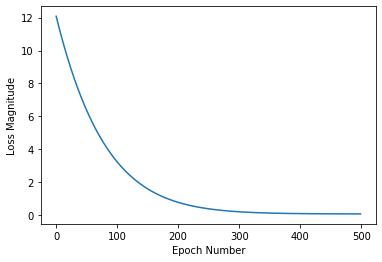

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

Now you have a model that has been trained to learn the relationship between `celsius_q` and `fahrenheit_a`. You can use the predict method to have it calculate the Fahrenheit degrees for a previously unknown Celsius degrees.

So, for example, if the Celsius value is 100, what do you think the Fahrenheit result will be? Take a guess before you run this code.

In [ ]:
print(model.predict([100.0]))

[[211.74036]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [ ]:
print("These are the layer variables: {}".format(l0.get_weights()))

The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [ ]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.7474]]
Model predicts that 100 degrees Celsius is: [[211.7474]] degrees Fahrenheit
These are the l0 variables: [array([[-0.3695859 ,  0.72354114, -0.6484167 ,  0.08811317]],
      dtype=float32), array([ 0.34059355,  4.5094137 , -4.22488   , -3.7227216 ], dtype=float32)]
These are the l1 variables: [array([[ 0.3450758 ,  0.45044178, -1.2013386 , -0.00657928],
       [ 0.82886463,  0.592218  ,  0.43479663,  1.3290651 ],
       [-0.5315449 , -0.55025715,  0.9610584 , -0.6728937 ],
       [ 0.34909233, -1.6746137 , -0.45946455, -0.34411386]],
      dtype=float32), array([ 3.9107125 ,  4.117259  , -0.44789279,  4.3565836 ], dtype=float32)]
These are the l2 variables: [array([[ 0.506861  ],
       [ 0.8368604 ],
       [-0.12577184],
       [ 0.7196003 ]], dtype=float32), array([3.9947715], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the `l0` and `l1` layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.

Stay tuned for the upcoming video on how Dense layers work for the explanation.